# box plot (oblong, np) using TPM from gtf

both 2 reps for WT and Mnpm2a

In [5]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# read in TPM

In [6]:
stage = 'oblong'

In [7]:
### TPM_mat.tsv is from make9_PCA_corr_TPM.ipynb
TPM_mat = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/analysis/TPM_mat.tsv', sep='\t', index_col=0)
TPM_mat


,npm2a_oocyte_rep1,npm2a_oocyte_rep2,wt_oocyte_rep1,wt_oocyte_rep2,npm2a_64_rep1,npm2a_64_rep2,wt_64_rep1,wt_64_rep2,npm2a_1k_rep1,npm2a_1k_rep2,wt_1k_rep1,wt_1k_rep2,npm2a_oblong_rep1,npm2a_oblong_rep2,wt_oblong_rep1,wt_oblong_rep2
transcript_id,,,,,,,,,,,,,,,,
ENSDART00000000004.5,8.520701,7.431166,8.624373,6.697707,11.538301,11.476787,18.513748,17.779011,9.261952,10.614139,17.519306,22.326849,8.674476,8.196773,16.041828,17.693708
ENSDART00000000005.7,1.024967,0.733045,1.757980,2.206261,0.391525,0.465070,0.552102,0.105373,0.621153,0.444556,0.079437,0.499559,0.210575,0.148137,0.480869,0.566237
ENSDART00000000042.11,459.977264,455.128815,373.738953,401.077515,184.202454,175.385605,225.395050,229.838364,177.435471,174.723312,264.523651,127.428307,187.090408,180.565781,291.662262,129.231781
ENSDART00000000069.8,72.523178,63.763226,26.886013,31.735069,90.307129,92.256432,100.090172,108.151817,91.104073,92.367126,118.375267,67.422577,84.187668,85.556686,114.944946,72.795593
ENSDART00000000070.7,159.322525,167.249451,250.365891,259.300659,103.493813,99.687263,200.722107,196.189682,79.637741,87.429970,123.049774,120.606468,61.175957,66.828812,110.156685,80.787857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSDART00000194999.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSDART00000195000.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSDART00000195001.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.336064


# MZ / Z genes

In [8]:
public_gene_ls = pd.read_excel(
    '/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/public_ZGA_genes/cell_reports_2023.xlsx',
    sheet_name = 'Sheet1', usecols = ['Gene ID', 'classification', 'sub classification']
              )
public_gene_ls

,Gene ID,classification,sub classification
0,sept10,M,M-stable
1,aaas,M,M-stable
2,aacs,M,M-stable
3,aass,M,M-stable
4,abca12,M,M-stable
...,...,...,...
10337,znf974,Z,Z
10338,znf983,Z,Z
10339,znf987,Z,Z
10340,znf995,Z,Z


In [9]:
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.genePredExt'
tr_gene_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
tr_gene_pd = tr_gene_pd.iloc[:,[0,11]]
tr_gene_pd.columns = ['transcript_id', 'gene_id']
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11.ensGeneToGeneSymbol.txt'
gene_symbol_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
gene_symbol_pd.columns = ['gene_id', 'gene_symbol']
tr_gene_symbol_pd = pd.merge(tr_gene_pd, gene_symbol_pd, on="gene_id")

tr_gene_symbol_pd.head()

,transcript_id,gene_id,gene_symbol
0,ENSDART00000164359.1,ENSDARG00000099104.1,rpl24
1,ENSDART00000158290.1,ENSDARG00000099104.1,rpl24
2,ENSDART00000157701.1,ENSDARG00000099104.1,rpl24
3,ENSDART00000167898.1,ENSDARG00000099104.1,rpl24
4,ENSDART00000166393.1,ENSDARG00000102407.2,cep97


In [10]:
trans_MZ = tr_gene_symbol_pd.loc[tr_gene_symbol_pd['gene_symbol'].isin(public_gene_ls.loc[public_gene_ls['classification']=='MZ']['Gene ID'])]['transcript_id'].str.split('.', expand = True)[0].tolist()
trans_Z = tr_gene_symbol_pd.loc[tr_gene_symbol_pd['gene_symbol'].isin(public_gene_ls.loc[public_gene_ls['classification']=='Z']['Gene ID'])]['transcript_id'].str.split('.', expand = True)[0].tolist()

print(len(trans_MZ))
print(len(trans_Z))


16108
775


In [11]:
TPM_mat.head()

,npm2a_oocyte_rep1,npm2a_oocyte_rep2,wt_oocyte_rep1,wt_oocyte_rep2,npm2a_64_rep1,npm2a_64_rep2,wt_64_rep1,wt_64_rep2,npm2a_1k_rep1,npm2a_1k_rep2,wt_1k_rep1,wt_1k_rep2,npm2a_oblong_rep1,npm2a_oblong_rep2,wt_oblong_rep1,wt_oblong_rep2
transcript_id,,,,,,,,,,,,,,,,
ENSDART00000000004.5,8.520701,7.431166,8.624373,6.697707,11.538301,11.476787,18.513748,17.779011,9.261952,10.614139,17.519306,22.326849,8.674476,8.196773,16.041828,17.693708
ENSDART00000000005.7,1.024967,0.733045,1.757980,2.206261,0.391525,0.465070,0.552102,0.105373,0.621153,0.444556,0.079437,0.499559,0.210575,0.148137,0.480869,0.566237
ENSDART00000000042.11,459.977264,455.128815,373.738953,401.077515,184.202454,175.385605,225.395050,229.838364,177.435471,174.723312,264.523651,127.428307,187.090408,180.565781,291.662262,129.231781
ENSDART00000000069.8,72.523178,63.763226,26.886013,31.735069,90.307129,92.256432,100.090172,108.151817,91.104073,92.367126,118.375267,67.422577,84.187668,85.556686,114.944946,72.795593
ENSDART00000000070.7,159.322525,167.249451,250.365891,259.300659,103.493813,99.687263,200.722107,196.189682,79.637741,87.429970,123.049774,120.606468,61.175957,66.828812,110.156685,80.787857


In [12]:
TPM_MZ = TPM_mat.reset_index().loc[TPM_mat.reset_index()['transcript_id'].str.split('.', expand = True)[0].isin(trans_MZ)][['npm2a_oblong_rep1','npm2a_oblong_rep2','wt_oblong_rep1','wt_oblong_rep2']]
TPM_MZ['Classification'] = 'MZ'
TPM_Z = TPM_mat.reset_index().loc[TPM_mat.reset_index()['transcript_id'].str.split('.', expand = True)[0].isin(trans_Z)][['npm2a_oblong_rep1','npm2a_oblong_rep2','wt_oblong_rep1','wt_oblong_rep2']]
TPM_Z['Classification'] = 'Z'
TPM_Z

,npm2a_oblong_rep1,npm2a_oblong_rep2,wt_oblong_rep1,wt_oblong_rep2,Classification
345,0.000000,0.000000,0.000000,0.000000,Z
399,51.360291,47.188732,107.555038,34.196484,Z
512,20.963852,24.986540,83.580231,26.127558,Z
516,0.130133,0.103122,4.141542,0.339195,Z
578,2.849626,3.793112,32.380711,1.819189,Z
...,...,...,...,...,...
64283,2.148572,0.273467,3.786077,0.579298,Z
64378,0.632335,0.989901,2.473580,0.271297,Z
64667,0.000000,0.000000,0.000000,0.000000,Z
64714,0.021808,0.012078,0.065411,0.016494,Z


In [13]:
TPM_MZ_Z = pd.concat([TPM_MZ, TPM_Z])
TPM_MZ_Z['M'] = np.log2(((TPM_MZ_Z['npm2a_oblong_rep1'] + TPM_MZ_Z['npm2a_oblong_rep2'])/2 + 0.0001) / ((TPM_MZ_Z['wt_oblong_rep1'] + TPM_MZ_Z['wt_oblong_rep2'])/2 + 0.0001))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MZ v.s. Z: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.311e-34 U_stat=7.846e+06


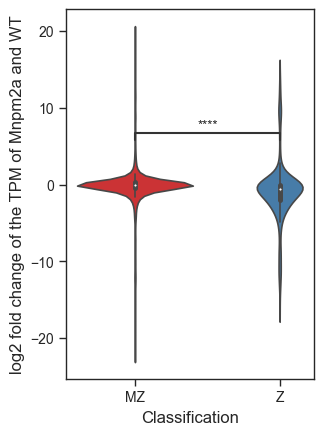

In [14]:
#### log2(2rpkm) - log2(1rpkm) as Y
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(1, 1, figsize=(6.4 * .5, 4.8))
    ax = axes
    sns.violinplot(
        data = TPM_MZ_Z,
        x = 'Classification',
        y = 'M',
        # showfliers = False,
        # width = 0.5,
        palette = 'Set1',
        ax = axes
    )
    
    add_stat_annotation(ax, data=TPM_MZ_Z, x='Classification', y='M',
            box_pairs=[('MZ', 'Z')],
            test='Mann-Whitney', text_format='star', loc='inside', verbose=2)       
    ax.set_ylabel('log2 fold change of the TPM of Mnpm2a and WT')
    fig.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/figures/make4_violin_TPM_Mnpm2a_MZ_Z.pdf', 
                transparent=True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MZ v.s. Z: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.311e-34 U_stat=7.846e+06


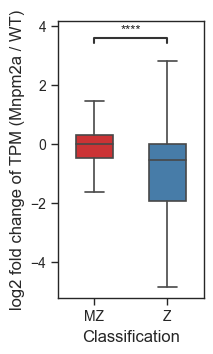

In [19]:
#### log2(2rpkm) - log2(1rpkm) as Y
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(1, 1, figsize=(6.4 * .35, 4.8 * .75), tight_layout = True)
    ax = axes
    sns.boxplot(
        data = TPM_MZ_Z,
        x = 'Classification',
        y = 'M',
        showfliers = False,
        width = 0.5,
        palette = 'Set1',
        ax = axes
    )
    
    add_stat_annotation(ax, data=TPM_MZ_Z, x='Classification', y='M',
            box_pairs=[('MZ', 'Z')],
            test='Mann-Whitney', text_format='star', loc='inside', verbose=2)       
    ax.set_ylabel('log2 fold change of TPM (Mnpm2a / WT)')
    fig.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/genes4_ko_analysis/RNAseq/figures/make4_box_TPM_Mnpm2a_MZ_Z.pdf', 
                transparent=True)

In [1]:
import scipy
scipy.__version__

'1.5.4'

!!! used the p value from scipy.stats.mannwhitneyu

In [20]:
scipy.stats.mannwhitneyu(TPM_MZ_Z.loc[TPM_MZ_Z['Classification']=='MZ']['M'], TPM_MZ_Z.loc[TPM_MZ_Z['Classification']=='Z']['M'])

MannwhitneyuResult(statistic=4637440.0, pvalue=4.65543837358929e-34)